# Starter EDA for Telecom ML Platform

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

# 🔹 Start Spark session
spark = SparkSession.builder \
    .appName("TelecomDataProcessing") \
    .getOrCreate()

# 🔹 Paths
PROCESSED_PATH = "../data/processed/parquet/"

sns.set(style="whitegrid")

In [4]:
# Load processed datasets
user_features = pd.read_parquet(PROCESSED_PATH + "user_feature_matrix.parquet")
tower_features = pd.read_parquet(PROCESSED_PATH + "tower_feature_matrix.parquet")
traffic_volume = pd.read_parquet(PROCESSED_PATH + "traffic_volume.parquet")
network_behaviors = pd.read_parquet(PROCESSED_PATH + "network_behaviors.parquet")

# ─────────────────────────────────────────────
# 🧭 1. Dataset Overview
# ─────────────────────────────────────────────

In [11]:
print("\nUser Features:")
print(user_features.info())
print(user_features.describe())

print("\nTower Features:")
print(tower_features.info())
print(tower_features.describe())


User Features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           500 non-null    object 
 1   churned           500 non-null    int32  
 2   avg_minutes       500 non-null    float64
 3   avg_data_gb       500 non-null    float64
 4   avg_satisfaction  500 non-null    float64
 5   age               500 non-null    int64  
 6   gender            500 non-null    object 
 7   region_id         500 non-null    int64  
 8   signup_date       500 non-null    object 
 9   is_enterprise     500 non-null    int64  
 10  avg_data          500 non-null    float64
dtypes: float64(4), int32(1), int64(3), object(3)
memory usage: 41.1+ KB
None
          churned  avg_minutes  avg_data_gb  avg_satisfaction         age  \
count  500.000000   500.000000   500.000000        500.000000  500.000000   
mean     0.134000   299.760333     7

# ─────────────────────────────────────────────
# 📊 2. Churn Distribution & Usage
# ─────────────────────────────────────────────

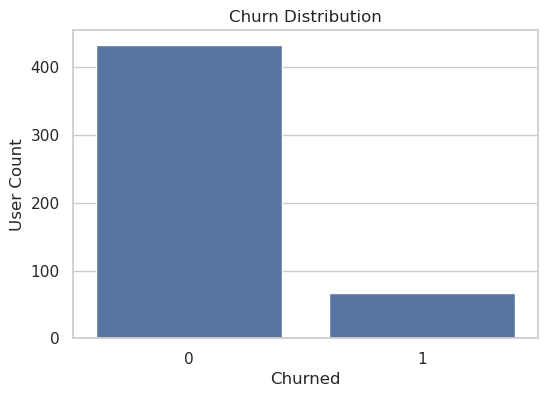

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x="churned", data=user_features)
plt.title("Churn Distribution")
plt.xlabel("Churned")
plt.ylabel("User Count")
plt.show()

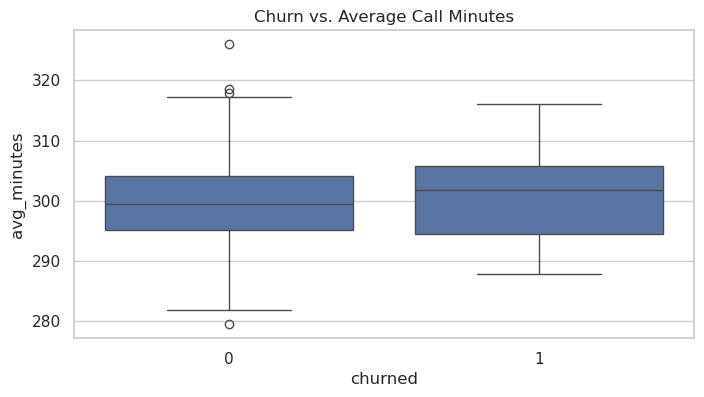

In [14]:
plt.figure(figsize=(8, 4))
sns.boxplot(x="churned", y="avg_minutes", data=user_features)
plt.title("Churn vs. Average Call Minutes")
plt.show()

# ─────────────────────────────────────────────
# 📈 3. Distribution of Features
# ─────────────────────────────────────────────

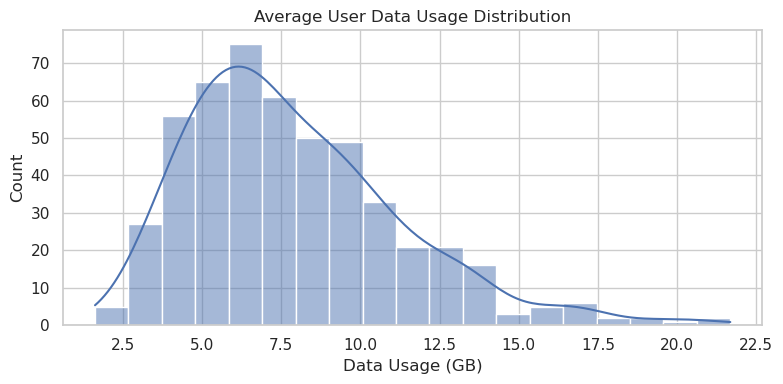

In [15]:
plt.figure(figsize=(8, 4))
sns.histplot(user_features["avg_data"].dropna(), kde=True)
plt.title("Average User Data Usage Distribution")
plt.xlabel("Data Usage (GB)")
plt.tight_layout()
plt.show()

# ─────────────────────────────────────────────
# 🔥 4. Correlation Heatmap
# ─────────────────────────────────────────────

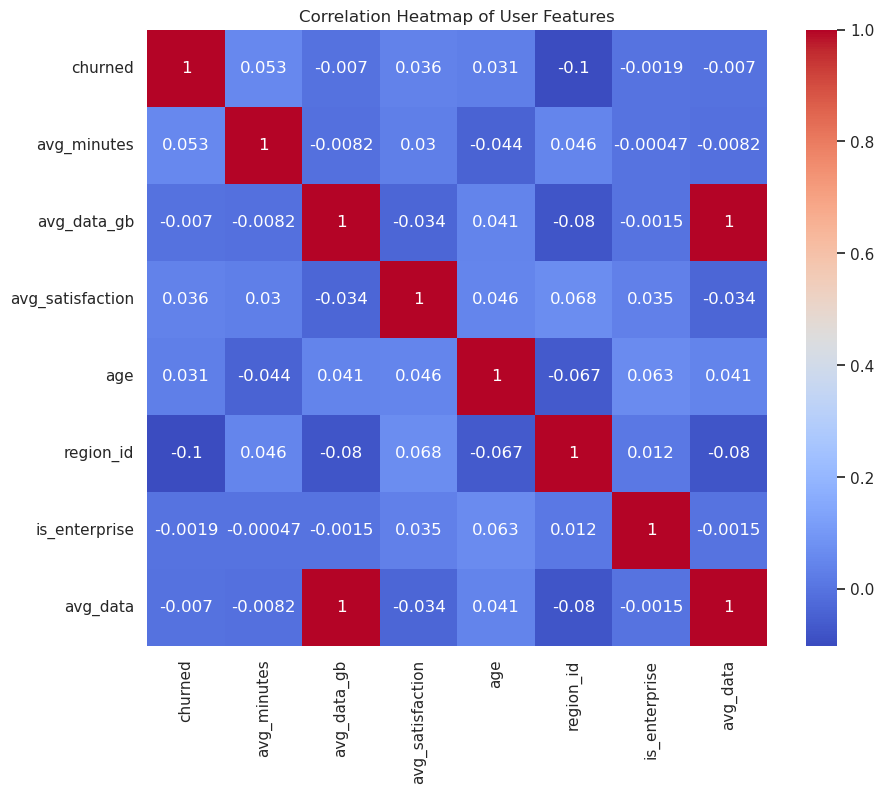

In [16]:
numeric_cols = user_features.select_dtypes(include=["number"])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of User Features")
plt.show()

# ─────────────────────────────────────────────
# 🕒 5. Traffic Trends
# ─────────────────────────────────────────────

In [17]:
traffic_volume["hour"] = pd.to_datetime(traffic_volume["hour"])
traffic_volume["hour_of_day"] = traffic_volume["hour"].dt.hour
hourly_traffic = traffic_volume.groupby("hour_of_day")["total_calls"].mean()

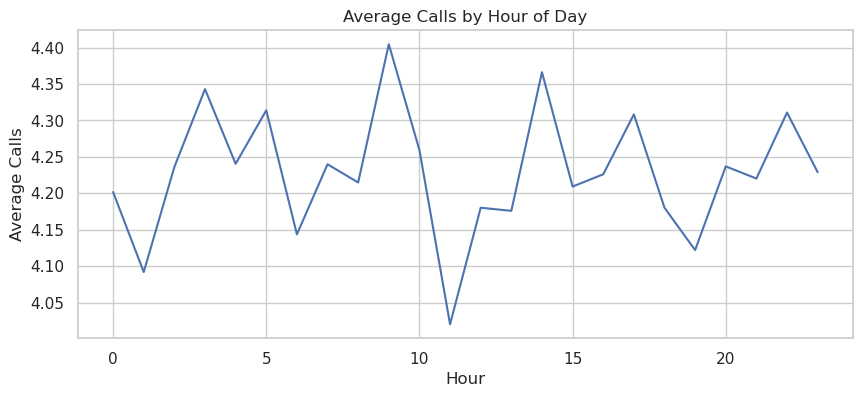

In [18]:
plt.figure(figsize=(10, 4))
hourly_traffic.plot()
plt.title("Average Calls by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Average Calls")
plt.grid(True)
plt.show()

# ─────────────────────────────────────────────
# ⚠️ 6. Anomaly Distribution
# ─────────────────────────────────────────────

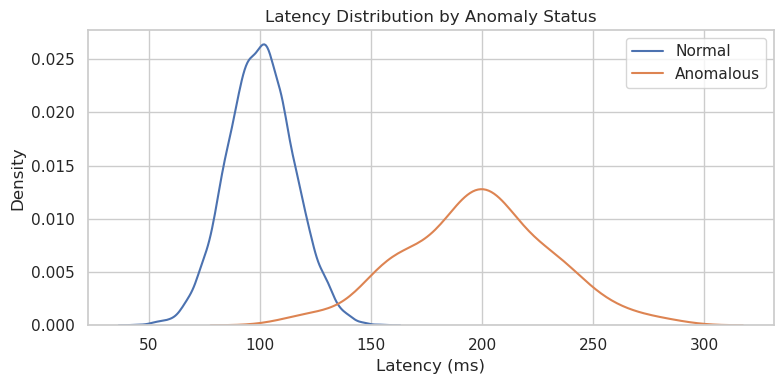

In [19]:
plt.figure(figsize=(8, 4))
sns.kdeplot(network_behaviors[network_behaviors["anomaly"] == 0]["latency_ms"], label="Normal")
sns.kdeplot(network_behaviors[network_behaviors["anomaly"] == 1]["latency_ms"], label="Anomalous")
plt.title("Latency Distribution by Anomaly Status")
plt.xlabel("Latency (ms)")
plt.legend()
plt.tight_layout()
plt.show()